In [2]:
#data set 

a = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1
     ]

b = [0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0]

c = [0,1,1,1,1,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,1,1,1,0
     ]

#building a 3 letter classifier 
#ignoring the bias 



In [3]:
#creating labels , which is a numpy nd array with diagonal values 1 

y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

import numpy as np 
import matplotlib.pyplot as plt 



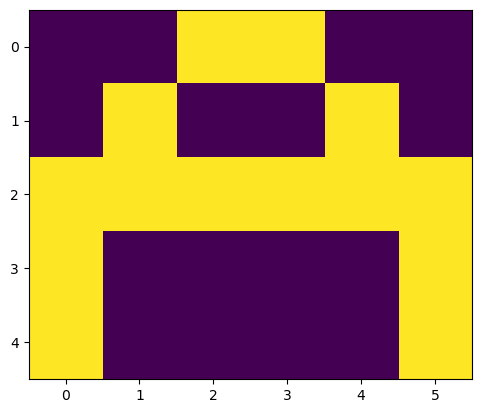

In [4]:
#visualise the data 
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [5]:
#convert data and labels into numpy array 
x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y = np.array(y)

print(x,"\n\n", y)
                                                    

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [6]:
#layers --- input (1,30)
# hidden layer will have (1,5)
#output layer (3,3)



In [10]:
#creating an activation function 
#defining the sigmoid function 
def sigmoid(x):
    return(1/(1+np.exp(-x)))

#creating feed  forward propagation (NN)

def f_forward(x,w1,w2):
    #hidden layer (linear algorithm to simplify the modeling of the data)
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    
    #ouput layer 
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)





In [11]:
#initialising the weights 
def generate_wts(x,y):
    l = []
    for i in range (x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))



In [12]:
#creating and checking using loss function 

def loss(out, Y ):
    s = (np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

In [13]:
#back propagation 
def back_prop(x,y,w1,w2,alpha):
    
    #hidden layer 
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    
    #output layer 
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    d2 = (a2 - y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),np.multiply(a1,1-a1))
    
    #gradient 
    
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    
    w1=w1 - (alpha*(w1_adj))
    w2=w2 - (alpha*(w2_adj))
    
    return(w1,w2)
    

In [14]:
#training the dataset 
#alpha is used to 
def train(x,Y,w1,w2,alpha = 0.01 , epoch = 10):
    acc = []
    loss_list = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1 ,w2)
            l.append((loss(out,Y[i])))
            w1 , w2 = back_prop(x[i],y[i],w1,w2,alpha)
        print("Epochs: " , j+1 , "acc:" , (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        loss_list.append((sum(l))/len(x))
    return (acc, loss , w1, w2)
            

In [15]:
#defining the function to predict the values 
def predict(x,w1,w2):
    Out = f_forward(x,w1,w2)
    maxm = 0 
    k = 0 
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
        if (k==0):
            print("Image is of letter A")
        elif( k == 1):
            print("Image is of letter B ")
        else:
            print("Image is of letter C")
        plt.imshow(x.reshape(5,6))
        plt.show()

In [17]:
w1 = generate_wts(30,5)
w2 = generate_wts(5,3)
print(w1,"\n", w2)



[[-5.12024836e-01 -9.83841783e-01 -2.93465698e-01  4.19408101e-01
  -1.57262409e+00]
 [-1.95718985e+00 -1.38996625e-01  1.04526122e+00 -1.62017844e+00
  -1.69055739e-01]
 [-1.09244703e+00  4.31617851e-01  4.13660921e-01 -7.39708731e-01
  -5.93507873e-01]
 [-2.40591300e-01  2.00958670e+00  1.89883014e-01 -5.22561118e-01
   3.01973592e-01]
 [ 6.57440086e-01 -1.18626352e+00 -8.83414704e-01  6.36487138e-01
   1.78968314e+00]
 [ 1.30623109e+00 -1.53869253e+00 -1.58892752e+00 -3.00184369e-02
   7.79282793e-01]
 [ 1.81741166e+00 -3.91978569e-01  2.54357606e-01  4.38492278e-01
  -3.68381615e-02]
 [ 8.87326820e-01 -1.27529236e+00 -1.27341506e-01  1.26568792e-01
   9.32144828e-01]
 [ 1.76269677e-01 -1.31531805e+00 -7.33177004e-01  9.22805567e-01
  -8.10012927e-02]
 [ 2.28824831e-01 -7.49226759e-01 -6.78198297e-01  1.92738365e+00
  -6.02460076e-01]
 [ 4.81876426e-01  1.81516183e+00 -2.13069488e-01  1.51145431e-01
   2.74638726e+00]
 [ 1.82950565e-01 -5.82128399e-01 -2.89814205e-01  6.33908046e-01

In [22]:
#getting the accuracy the loss and the weights after training 
acc, losss , w1 , w2 = train(x,y,w1,w2,0.01 ,100)


Epochs:  1 acc: 82.9664717064407
Epochs:  2 acc: 83.0184963308859
Epochs:  3 acc: 83.06953581027786
Epochs:  4 acc: 83.11961396835126
Epochs:  5 acc: 83.16875404499856
Epochs:  6 acc: 83.21697871087268
Epochs:  7 acc: 83.26431008153456
Epochs:  8 acc: 83.31076973116727
Epochs:  9 acc: 83.35637870587674
Epochs:  10 acc: 83.40115753659798
Epochs:  11 acc: 83.4451262516251
Epochs:  12 acc: 83.48830438878174
Epochs:  13 acc: 83.5307110072484
Epochs:  14 acc: 83.57236469906138
Epochs:  15 acc: 83.6132836002978
Epochs:  16 acc: 83.65348540195993
Epochs:  17 acc: 83.69298736057138
Epochs:  18 acc: 83.73180630849723
Epochs:  19 acc: 83.76995866399871
Epochs:  20 acc: 83.80746044103333
Epochs:  21 acc: 83.84432725880987
Epochs:  22 acc: 83.88057435110761
Epochs:  23 acc: 83.91621657536832
Epochs:  24 acc: 83.95126842156917
Epochs:  25 acc: 83.98574402088394
Epochs:  26 acc: 84.01965715414005
Epochs:  27 acc: 84.05302126007767
Epochs:  28 acc: 84.0858494434176
Epochs:  29 acc: 84.11815448274356


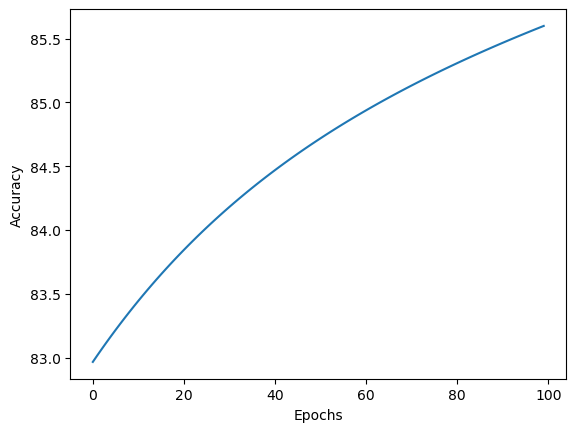

In [26]:
import matplotlib.pyplot as plt1

plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()